In [1]:
!pip install ray pdfplumber matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pdfplumber]3 [pdfminer.six]


# Demo #3: Scalable Unstructured Data Processing

2025-10-06 19:17:47,539	INFO worker.py:1927 -- Started a local Ray instance.


Serial Python runtime: 17.77 s
Ray runtime: 2.86 s


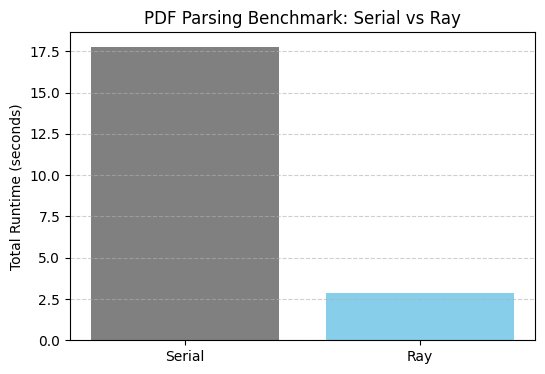

In [5]:
import time
import ray
import pdfplumber
import matplotlib.pyplot as plt

def parse_pdf(pdf_path: str):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text() or ""
    return len(text)

def run_serial(pdf_path: str, n: int = 100):
    start = time.time()
    for _ in range(n):
        _ = parse_pdf(pdf_path)
    return time.time() - start


# This decorator makes the function something called a Ray Task!
@ray.remote
def parse_pdf_ray(pdf_path: str):
    return parse_pdf(pdf_path)

def run_ray(pdf_path: str, n: int = 100):
    start = time.time()
    futures = [parse_pdf_ray.remote(pdf_path) for _ in range(n)]
    _ = ray.get(futures)
    return time.time() - start

pdf_file = "sample.pdf"
N = 100

# This will initialize a Ray cluster. Locally this is easy (one node),
# for a true distributed setup see notes below.
ray.init(ignore_reinit_error=True, include_dashboard=False)

serial_time = run_serial(pdf_file, N)
ray_time = run_ray(pdf_file, N)

ray.shutdown()

print(f"Serial Python runtime: {serial_time:.2f} s")
print(f"Ray runtime: {ray_time:.2f} s")

plt.figure(figsize=(6,4))
plt.bar(["Serial", "Ray"], [serial_time, ray_time], color=["gray", "skyblue"])
plt.title("PDF Parsing Benchmark: Serial vs Ray")
plt.ylabel("Total Runtime (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Why Ray and not `multiprocessing`?
1) Ray enables both parallel *and* distributed execution, with zero code changes!
2) Ray abstractions (e.g., Actors) offer several advantages for stateful computation, see this article: https://medium.com/data-science/10x-faster-parallel-python-without-python-multiprocessing-e5017c93cce1
3) Ray's 

# Deploying Ray Clusters On-Prem

##### https://docs.ray.io/en/latest/cluster/vms/user-guides/launching-clusters/on-premises.html

# Deploying Ray Clusters on the Cloud
##### https://docs.ray.io/en/latest/cluster/vms/user-guides/launching-clusters/aws.html
##### https://docs.ray.io/en/latest/cluster/vms/user-guides/launching-clusters/azure.html
##### https://docs.ray.io/en/latest/cluster/vms/user-guides/launching-clusters/gcp.html